In [117]:
import pandas as pd
from sklearn import preprocessing
import argparse
import numpy as np
import scipy
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from time import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.grid_search import ParameterGrid
import pylab as pl
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from scipy import interp
from sklearn.cross_validation import StratifiedKFold
import math
import sys
%matplotlib inline

In [103]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Label Encoding
lab = preprocessing.LabelEncoder()
data.job = lab.fit_transform(data.job)
data.marital = lab.fit_transform(data.marital)
data.education = lab.fit_transform(data.education)
data.default = lab.fit_transform(data.default)
data.housing = lab.fit_transform(data.housing)
data.loan = lab.fit_transform(data.loan)
data.contact = lab.fit_transform(data.contact)
data.month = lab.fit_transform(data.month)
data['day_of_week'] = lab.fit_transform(data['day_of_week'])
data.poutcome = lab.fit_transform(data.poutcome)
data.y = lab.fit_transform(data.y)

In [104]:
features = data.as_matrix() # features shape: (41188, 21)
target = features[:, 20]
features_numeric = features[:, 0:20] # shape: (41188, 20) (index 20 won't be included)

In [105]:
print(features_numeric[0])
# [  5.60000000e+01   3.00000000e+00   1.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
#    6.00000000e+00   1.00000000e+00   2.61000000e+02   1.00000000e+00
#    9.99000000e+02   0.00000000e+00   1.00000000e+00   1.10000000e+00
#    9.39940000e+01  -3.64000000e+01   4.85700000e+00   5.19100000e+03]

# One-k-scheme encoding
from sklearn.preprocessing import OneHotEncoder
cat_indices = np.array([[1,2,3,4,5,6,7,8,9,14]]) # [[ 1  2  3  4  5  6  7  8  9 14]]

enc = OneHotEncoder(categorical_features = cat_indices)
encoded_features1 = enc.fit_transform(features_numeric)
print(enc.n_values_)
# [12  4  8  3  3  3  2 10  5  3]

print(enc.feature_indices_)
# [ 0 12 16 24 27 30 33 35 45 50 53]

print(len(encoded_features1.toarray()[0]))
# 63

print(encoded_features1.toarray()[0]) # print the first row of data (it has rearranged category features in front of all continuous features)
# [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00(housemaid, which is encoded as 3)
#    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
#    0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
#    1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
#    1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
#    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
#    0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
#    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
#    0.00000000e+00   5.60000000e+01   2.61000000e+02   1.00000000e+00
#    9.99000000e+02   0.00000000e+00   1.10000000e+00   9.39940000e+01
#   -3.64000000e+01   4.85700000e+00   5.19100000e+03]


[  5.60000000e+01   3.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   6.00000000e+00   1.00000000e+00   2.61000000e+02   1.00000000e+00
   9.99000000e+02   0.00000000e+00   1.00000000e+00   1.10000000e+00
   9.39940000e+01  -3.64000000e+01   4.85700000e+00   5.19100000e+03]
[12  4  8  3  3  3  2 10  5  3]
[ 0 12 16 24 27 30 33 35 45 50 53]
63
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+

In [106]:
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(encoded_features1.todense(), target, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(24712, 63)
(16476, 63)


In [133]:
def run_classifier(classifier_id):    
    classifiers = (None, RandomForestClassifier, SVC, LogisticRegression, DecisionTreeClassifier)

    # TODO: after encoding, we have 63 features. What is the range of max_depth without overfitting?
    grid_RF = [{'max_depth': [10, 15], 'criterion': ['entropy', 'gini'], 'n_estimators': [50, 100, 250], 'class_weight': ['balanced']}]
    
    # TODO: do we need to include linear kernel?
    grid_SVC = [{'kernel': ['rbf'], 'C': [0.1, 1.0, 100.0], 'gamma': [0.001, 0.1, 10.0], 'class_weight': ['balanced'], 'probability': [True]}]
    
    # TODO: scale every predictor variable with maximum absolute value first, then train the model
    grid_LR = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced']}]

    # TODO: after encoding, we have 63 features. What is the range of max_depth without overfitting?
    grid_DT = [{'criterion': ['entropy', 'gini'], 'max_depth': [10, 15]}]

    grids = (None, grid_RF, grid_SVC, grid_LR, grid_DT)
    grid_obj = grids[classifier_id]
    cls_obj = classifiers[classifier_id]

    best_param = None
    best_score = None
    best_model = None
    print ("Performing cross validation using parameter grid...")
    for one_param in ParameterGrid(grid_obj):
        cls = cls_obj(**one_param)

        one_score = cross_val_score(cls, X_train, Y_train, cv=5, scoring='roc_auc')
        mscore = one_score.mean()

#         print ("param=%s, score=%.6f" % (repr(one_param),mscore))

        if ( best_score is None or best_score < mscore): 
            best_param = one_param
            best_score = mscore
            best_model = cls
    
    print ("Best score for Cross Validation: %.6f" % best_score)
    print("Best param: %s" % repr(best_param))

    ### ROC
    classifier_name_list = (None, "Random Forest", "SVM", "Logistic Regression", "Decision Trees")
    best_model.fit(X_train, Y_train)
    
    # len(best_model.feature_importances_) = 63 (there are 63 features after encoding)
    print("best_model.feature_importances_: %s" % repr(best_model.feature_importances_))
    
    best_params = get_best_model_params(best_model, X_train, Y_train, classifier_name_list[classifier_id])
    print("(best_fpr, best_tpr, best_threshold) = ")
    print(best_params)
    
    predict_test(best_model, X_test, Y_test, classifier_name_list[classifier_id], best_params)

    
def predict_test(best_model, x_data, y_data, classifier_name, best_params):
    probas_ = best_model.predict_proba(x_data) # len(probas_) = size of testing set
#     print("probas_ = ")
#     print(probas_)    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_data, probas_[:, 1]) # pick prob. of yes(encoded as 1)(corresponds to index 1)
#     print("=============")
#     print("length of fpr = " + str(len(fpr))) # 237
#     print(fpr)
#     print("length of tpr = " + str(len(tpr))) # 237
#     print(tpr)
#     print("length of thresholds = " + str(len(thresholds))) # 237
#     print(thresholds)
#     print("=============")    
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)    
    plot_roc_curve(fpr, tpr, roc_auc, classifier_name)    
    
    # assess the model based on best_threshold
    best_fpr = best_params[0]
    best_tpr = best_params[1]
    best_threshold = best_params[2]
    
    tp_plus_fn = 0
    tn_plus_fp = 0
    tp = 0
    fp = 0
    for item in zip(y_data, probas_[:, 1]):
        if item[0] == 1.0:
            tp_plus_fn += 1
        else:
            tn_plus_fp += 1
        
        if item[1] >= best_threshold:
            # predict as positive            
            if item[0] == 1.0:
                tp += 1
            else:
                fp += 1
    test_fpr = fp / tn_plus_fp
    test_tpr = tp / tp_plus_fn
    print("(test_fpr, test_tpr) = ")
    print((test_fpr, test_tpr))
    
    
def get_best_model_params(best_model, x_data, y_data, classifier_name):
    probas_ = best_model.predict_proba(x_data) # len(probas_) = size of training set
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_data, probas_[:, 1]) # pick prob. of yes(encoded as 1)(corresponds to index 1)
    
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)    
    plot_roc_curve(fpr, tpr, roc_auc, classifier_name)

    # find best params
    best_fpr = None
    best_tpr = None
    best_threshold = None
    min_distance = sys.maxsize
    for item in zip(fpr, tpr, thresholds):
        distance = math.sqrt(math.pow(item[0], 2) + math.pow(item[1] - 1, 2))
        if min_distance > distance:
            min_distance = distance
            best_fpr = item[0]
            best_tpr = item[1]
            best_threshold = item[2]
    
    return (best_fpr, best_tpr, best_threshold)
    

def plot_roc_curve(fpr, tpr, roc_auc, classifier_name):
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.0])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic- %s' % classifier_name)
    pl.legend(loc="lower right")
    pl.show()    

Performing cross validation using parameter grid...
Best score for Cross Validation: 0.939455
Best param: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 250, 'class_weight': 'balanced'}
best_model.feature_importances_: array([  5.31300080e-03,   6.41326770e-03,   2.18108189e-03,
         1.94603953e-03,   3.27805604e-03,   3.92023017e-03,
         2.45847641e-03,   3.92293236e-03,   2.75736060e-03,
         4.89099320e-03,   2.39614996e-03,   1.04193353e-03,
         4.24369884e-03,   6.10941844e-03,   6.11317030e-03,
         2.50125924e-04,   4.16878281e-03,   2.51686344e-03,
         4.65809753e-03,   5.77632957e-03,   3.61148839e-05,
         4.40808865e-03,   6.33472492e-03,   2.65164268e-03,
         6.07245385e-03,   6.12684347e-03,   1.34806572e-07,
         6.54184716e-03,   1.47705678e-03,   6.68882059e-03,
         5.31983522e-03,   1.62184665e-03,   5.10602953e-03,
         9.92199201e-03,   9.58506421e-03,   4.73551421e-03,
         2.35230686e-03,   5.54342580e

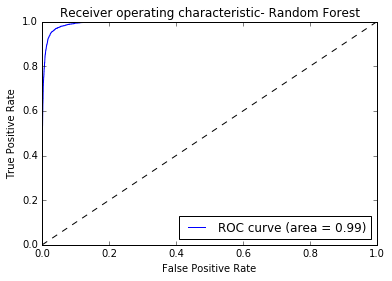

In [100]:
run_classifier(1)

Performing cross validation using parameter grid...
Best score for Cross Validation: 0.939371
Best param: {'criterion': 'entropy', 'n_estimators': 250, 'class_weight': 'balanced'}
best_model.feature_importances_: array([  9.60986879e-03,   8.24739782e-03,   3.16471700e-03,
         2.56264515e-03,   5.19937389e-03,   4.45532717e-03,
         3.51973784e-03,   5.60537811e-03,   3.13513520e-03,
         7.83393627e-03,   2.96496111e-03,   1.24704057e-03,
         6.13768477e-03,   9.59762653e-03,   9.02605931e-03,
         2.51402511e-04,   5.61912899e-03,   3.68550344e-03,
         6.75744313e-03,   9.21972779e-03,   2.41447155e-05,
         6.66991557e-03,   9.70899451e-03,   3.56405061e-03,
         6.74954462e-03,   6.05372017e-03,   1.13693243e-07,
         1.05051273e-02,   1.49450756e-03,   1.04422210e-02,
         7.29320475e-03,   1.48358478e-03,   7.24213231e-03,
         9.14740594e-03,   9.00732248e-03,   3.31492084e-03,
         2.31481614e-03,   4.52716875e-04,   2.37043480

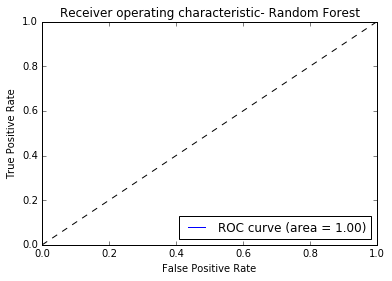

In [95]:
run_classifier(1)

In [70]:
# TODO BUG: cannot run SVM
run_classifier(2)

Performing cross validation using parameter grid...
param={'C': 0.1, 'gamma': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.908003
param={'C': 0.1, 'gamma': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.872253
param={'C': 0.1, 'gamma': 10.0, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.500502
param={'C': 1.0, 'gamma': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.911861
param={'C': 1.0, 'gamma': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.871831
param={'C': 1.0, 'gamma': 10.0, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.500502
param={'C': 100.0, 'gamma': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.874606
param={'C': 100.0, 'gamma': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.872437
param={'C': 100.0, 'gamma': 10.0, 'class_weight': 'balanced', 'kernel': 'rbf'}, score=0.500502
Best score for Cross Validation: 0.911861


AttributeError: predict_proba is not available when  probability=False

Performing cross validation using parameter grid...
Best score for Cross Validation: 0.870817
Best param: {'criterion': 'entropy', 'max_depth': 10}
best_model.feature_importances_: array([  1.34716314e-03,   1.21601065e-03,   8.37022866e-04,
         1.20036704e-03,   1.87445458e-03,   2.51546234e-04,
         9.68668435e-04,   1.16221509e-03,   8.60501475e-04,
         3.78065869e-03,   1.98296304e-03,   1.63905594e-03,
         2.11141608e-03,   2.16629798e-03,   2.27962890e-03,
         5.44219761e-04,   1.72046972e-03,   1.91229238e-03,
         8.01333931e-04,   2.61130493e-03,   0.00000000e+00,
         4.26868710e-03,   4.05346534e-03,   9.26032326e-04,
         1.79266746e-03,   4.46375707e-04,   0.00000000e+00,
         1.23708075e-03,   3.18121091e-04,   2.31107876e-03,
         2.87934268e-03,   0.00000000e+00,   1.20186848e-03,
         2.82470497e-03,   2.64106626e-04,   0.00000000e+00,
         0.00000000e+00,   5.69667325e-04,   6.00519913e-04,
         7.79910606e-04,  

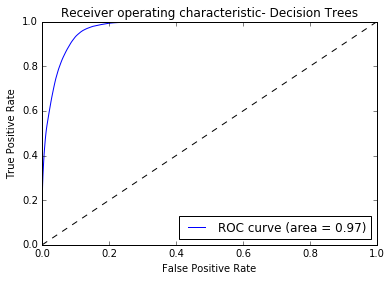

(best_fpr, best_tpr, best_threshold) = 
(0.10172201160188188, 0.93614757006030502, 0.16981132075471697)
Area under the ROC curve : 0.891800


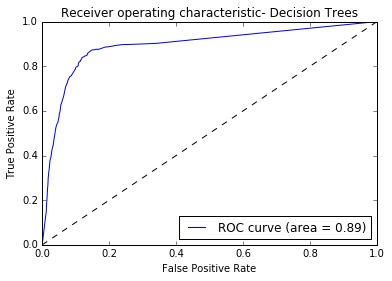

(test_fpr, test_tpr) = 
(0.1127942681678608, 0.8209774848984075)


In [132]:
run_classifier(4)

Performing cross validation using parameter grid...
param={'C': 1, 'class_weight': 'balanced'}, score=0.935803
Best score for Cross Validation: 0.935803
Area under the ROC curve : 0.938461


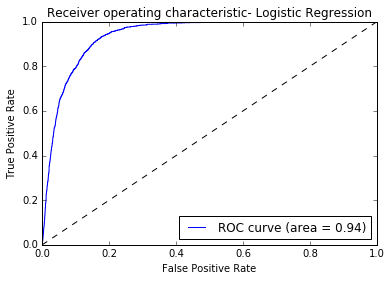

In [66]:
run_classifier(3) # balanced class weight

Performing cross validation using parameter grid...
param={'C': 1}, score=0.929493
Best score for Cross Validation: 0.929493
Area under the ROC curve : 0.931977


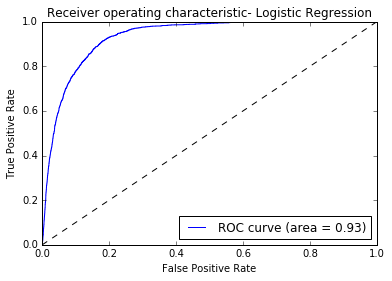

In [68]:
run_classifier(3) # all classes have weight one.

In [49]:
print(target)

[ 0.  0.  0. ...,  0.  1.  0.]


In [50]:
print(Y_test)

[ 1.  0.  0. ...,  0.  0.  0.]


In [85]:
x = np.linspace(1, 10, 10)
print(x)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [121]:
x = [1, 2, 3]
y = [8, 0, 4]
z = [-1, -1, -2]
# print(zip(x, y))
for item in zip(x, y, z):
    print(item)

(1, 8, -1)
(2, 0, -1)
(3, 4, -2)


In [128]:
for i in range(3):
    print(i)

0
1
2
